In [16]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs

from flask import Response
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
iphone_review=[]

In [13]:
for i in range(1,100):
    op= []
    url = "https://www.amazon.in/Apple-iPhone-14-128GB-Blue/product-reviews/B0BDK62PDX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    responce = requests.get(url)
    soup = bs(responce.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    iphone_review = iphone_review+op


In [14]:
iphone_review = list(set(iphone_review))
iphone_review

['\nApple are the best phone. Red colour is very beautiful\n',
 '\nValue for Money @80k The most important thing is that i like the cinematic mode in iphone 14 which is fabulous and batter backup.\n',
 '\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0Wanted 2 buy iPhone 14pro or max as the picture displayed like similar when you compare iPhone with pro and max. Hence it is Amazon who should have given me an options for various colors while loading and to choose from its 14 series..late uploaded though as I bought it as on sep 24th 2022.In regards the phone it is just like a cream in your hand , immensely smooth and the performance is at par. I would rate the rear camera A++ however they should have offered the charger at least along with cable.\n',
 "\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0The phone is really great and the feature and smoothness is tremendous. The blue colour is totally awesome.

In [15]:
iphone_review=[Text.strip() for Text in iphone_review] 
iphone_review=[Text for Text in iphone_review if Text] # removes empty strings.
iphone_review[0:10]

['Apple are the best phone. Red colour is very beautiful',
 'Value for Money @80k The most important thing is that i like the cinematic mode in iphone 14 which is fabulous and batter backup.',
 'The media could not be loaded.\n                \n\n\n\n\xa0Wanted 2 buy iPhone 14pro or max as the picture displayed like similar when you compare iPhone with pro and max. Hence it is Amazon who should have given me an options for various colors while loading and to choose from its 14 series..late uploaded though as I bought it as on sep 24th 2022.In regards the phone it is just like a cream in your hand , immensely smooth and the performance is at par. I would rate the rear camera A++ however they should have offered the charger at least along with cable.',
 "The media could not be loaded.\n                \n\n\n\n\xa0The phone is really great and the feature and smoothness is tremendous. The blue colour is totally awesome. Don't go for opinion just grab it. #Blue :)Thank You,Amazon (more lov

In [17]:
txt_upd = ' '.join(iphone_review)
txt_upd

'Apple are the best phone. Red colour is very beautiful Value for Money @80k The most important thing is that i like the cinematic mode in iphone 14 which is fabulous and batter backup. The media could not be loaded.\n                \n\n\n\n\xa0Wanted 2 buy iPhone 14pro or max as the picture displayed like similar when you compare iPhone with pro and max. Hence it is Amazon who should have given me an options for various colors while loading and to choose from its 14 series..late uploaded though as I bought it as on sep 24th 2022.In regards the phone it is just like a cream in your hand , immensely smooth and the performance is at par. I would rate the rear camera A++ however they should have offered the charger at least along with cable. The media could not be loaded.\n                \n\n\n\n\xa0The phone is really great and the feature and smoothness is tremendous. The blue colour is totally awesome. Don\'t go for opinion just grab it. #Blue :)Thank You,Amazon (more love) I was goi

In [18]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink
txt_upd


'apple are the best phone red colour is very beautiful value for money k the most important thing is that i like the cinematic mode in iphone which is fabulous and batter backup the media could not be loaded wanted buy iphone pro or max as the picture displayed like similar when you compare iphone with pro and max hence it is amazon who should have given me an options for various colors while loading and to choose from its series late uploaded though as i bought it as on sep th in regards the phone it is just like a cream in your hand immensely smooth and the performance is at par i would rate the rear camera a however they should have offered the charger at least along with cable the media could not be loaded the phone is really great and the feature and smoothness is tremendous the blue colour is totally awesome don t go for opinion just grab it blue thank you amazon more love i was going to buy iphone first but was waiting for new colour of blue whichwas worth waiting its blue colou

In [19]:
text_tokens = word_tokenize(txt_upd)

In [20]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [21]:
tf = TfidfVectorizer()

In [22]:
text_tf = tf.fit_transform(tokens_without_sw)


# Create the DataFrame


In [23]:
feature_names = tf.get_feature_names_out ()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)


In [24]:
df



,accepting,activity,add,added,additional,ads,amazon,amount,android,anti,...,waiting,wanted,waste,water,whichwas,work,worksoverall,worth,worthy,wrong
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
word_list = ' '.join(df)


In [26]:
wordcloud = WordCloud(background_color='black',width=1800,height=1400).generate(word_list)


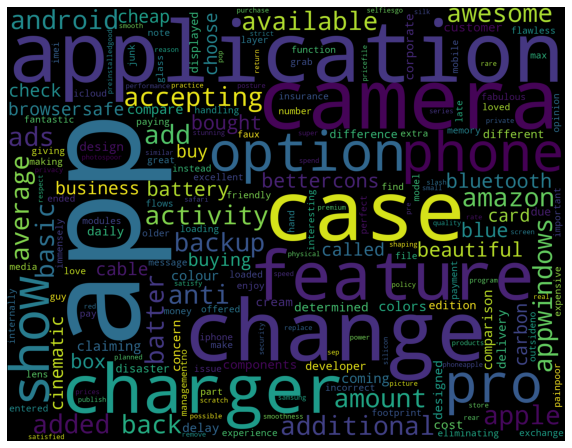

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



# 

# Sentimental Analysis


In [30]:
with open('positive-words .txt') as pw:
    positive_words = pw.read().split("\n")


In [31]:
positive_words = positive_words[35:]
positive_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [32]:
with open('negative-words.txt') as nw:
    negative_words = nw.read().split("\n")

In [33]:
negative_words = negative_words[35:]
negative_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [34]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [35]:
wordcloud_pos = WordCloud(background_color='black',width=1800,height=1400).generate(txt_pos_in_pw)


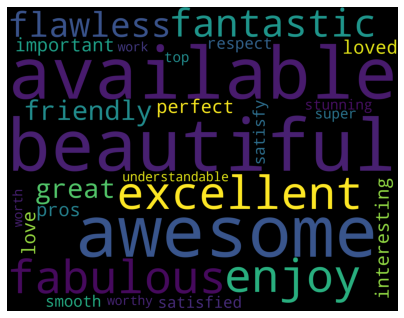

In [36]:
plt.figure(figsize=(7,15))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

In [37]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])


In [38]:
wordcloud_neg = WordCloud( background_color='black',width=1800,height=1400).generate(txt_neg_in_nw)


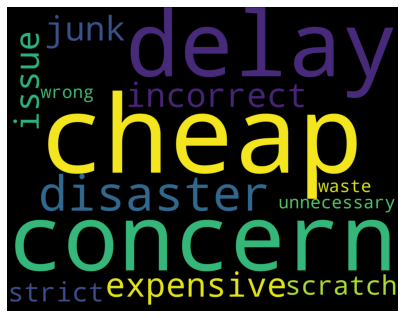

In [39]:
plt.figure(figsize=(7,15))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()


# END